In [1]:
import sys
sys.path.append('../')
from model.unet import UNet2D
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

/home/wwd/miniconda3/envs/pytorch1_13/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# image = './dataset/image/free_160.npy'
image = '../dataset/data_free_syn1.npz'
image = np.load(image)['arr_0']
image = image[165, :, :]

# label = './dataset/label/damp_160.npy'
label = '../dataset/data_damp_syn1.npz'
label = np.load(label)['arr_0']
label = label[165, :, :]

In [3]:
nx = image.shape[0]
dx = 4

nt = image.shape[1]
dt = 0.004

In [4]:
mean = np.mean(image)
std = np.std(image)
image =  (image - mean) / std

mean = np.mean(label)
std = np.std(label)
label =  (label - mean) / std

In [5]:
input = torch.from_numpy(image)
input.unsqueeze_(0)
input.unsqueeze_(0)
input.shape

torch.Size([1, 1, 751, 751])

In [6]:
net = UNet2D(1, 1)


weight = '../checkpoint/model_epoch_100.pth'
checkpoint = torch.load(weight)  # 先加载整个字典
net.load_state_dict(checkpoint["model_state_dict"])  # 仅加载模型权重

net.eval()

UNet2D(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
          (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [7]:
output = net(input)
output = output.squeeze().detach().numpy()
output.shape

(751, 751)

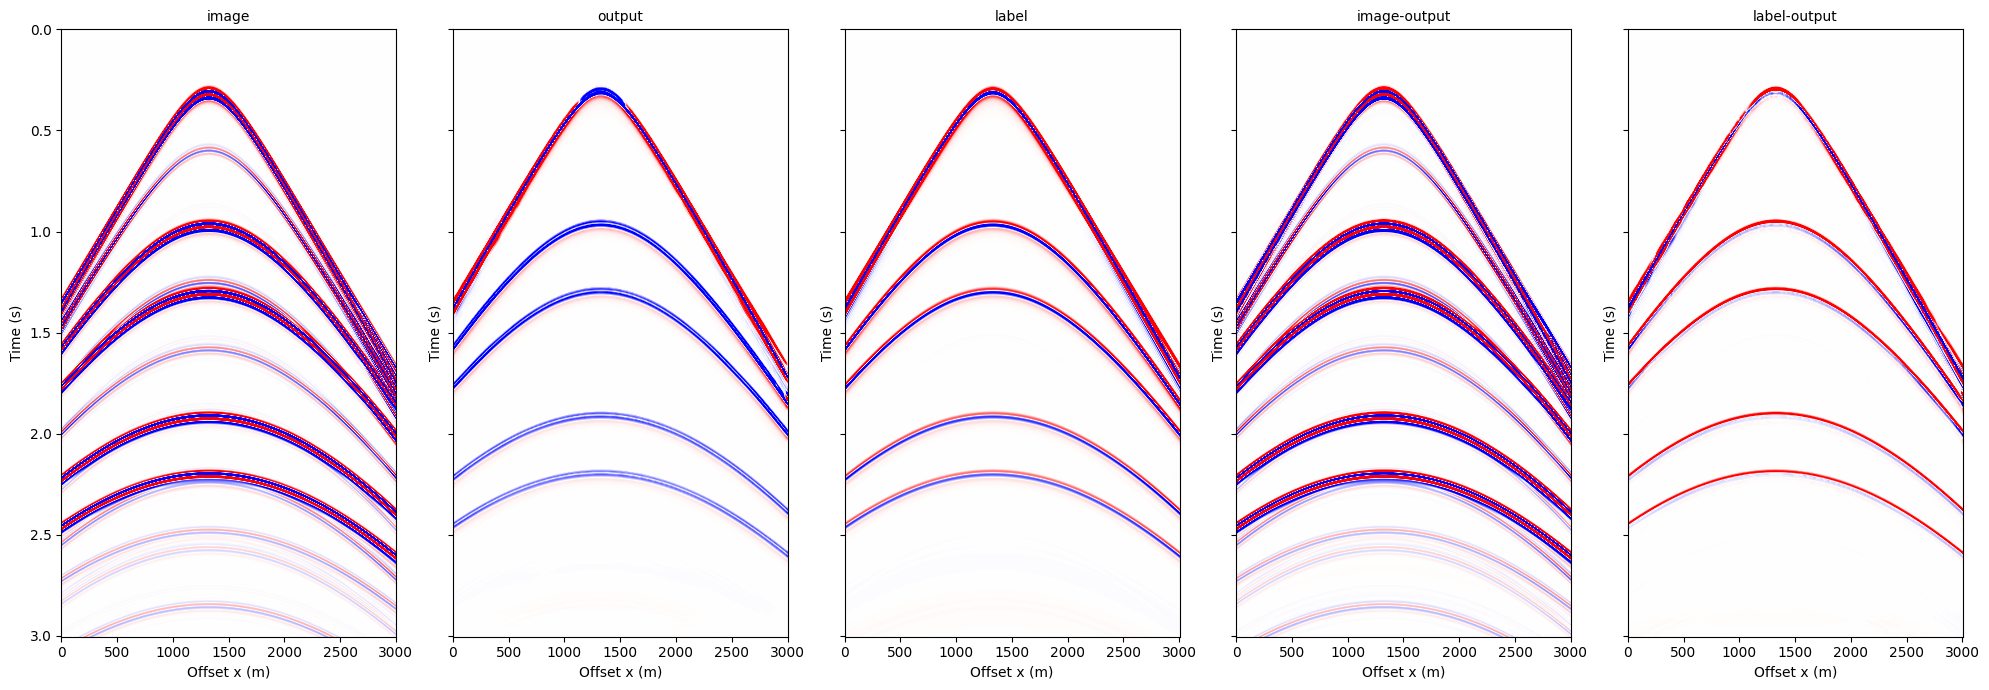

In [8]:
vmax = 5e-1
vmin = -vmax

fig, axs = plt.subplots(1, 5, figsize=(20, 7),sharey=True)

axs[0].imshow(image.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[0].set_title('image',fontsize=10)
axs[0].set_xlabel('Offset x (m)',fontsize=10)
axs[0].set_ylabel('Time (s)',fontsize=10)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)

axs[1].imshow(output.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[1].set_title('output',fontsize=10)
axs[1].set_xlabel('Offset x (m)',fontsize=10)
axs[1].set_ylabel('Time (s)',fontsize=10)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)

axs[2].imshow(label.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[2].set_title('label',fontsize=10)
axs[2].set_xlabel('Offset x (m)',fontsize=10)
axs[2].set_ylabel('Time (s)',fontsize=10)
axs[2].tick_params(axis='x', labelsize=10)
axs[2].tick_params(axis='y', labelsize=10)

diff1 = image - output
axs[3].imshow(diff1.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[3].set_title('image-output',fontsize=10)
axs[3].set_xlabel('Offset x (m)',fontsize=10)
axs[3].set_ylabel('Time (s)',fontsize=10)
axs[3].tick_params(axis='x', labelsize=10)
axs[3].tick_params(axis='y', labelsize=10)

diff2 = label - output
axs[4].imshow(diff2.T, aspect='auto', vmin=vmin, vmax=vmax, 
              extent=[0, nx*dx, nt*dt, 0], cmap='bwr_r')
axs[4].set_title('label-output',fontsize=10)
axs[4].set_xlabel('Offset x (m)',fontsize=10)
axs[4].set_ylabel('Time (s)',fontsize=10)
axs[4].tick_params(axis='x', labelsize=10)
axs[4].tick_params(axis='y', labelsize=10)

plt.tight_layout()